In [1]:
%run resources/library.py

# Notebook 2: Computing Convex Hulls - Part 1

## What is a Convex Hull?

To be able to create Voronoi tesselations, we must be able to create convex hulls.

From this [Medium Blog article](https://medium.com/@pascal.sommer.ch/a-gentle-introduction-to-the-convex-hull-problem-62dfcabee90c) a convex hull is 
> "a set of points is defined as the smallest convex polygon, that encloses all of the points in the set. Convex means that the polygon has no corner that is bent inwards."

### Methods to compute convex hulls (visual explanation)

Here is a YouTube below that explains three methods that can be used to compute convex hulls:
1. Jarvis March
2. Graham Scan
3. Chan's Algorithm

In [2]:
show_youtube(url='https://www.youtube.com/embed/ZnTiWcIznEQ', width=900, height=500)

### Using the `scipy.spatial` library

The Quickhull Algorithm is another method to compute convex hulls. We can add that as a fourth method:

4. Quickhull Algorithm

We will use the `scipy.spatial` library to plot a convex hull from random points.

In [3]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np

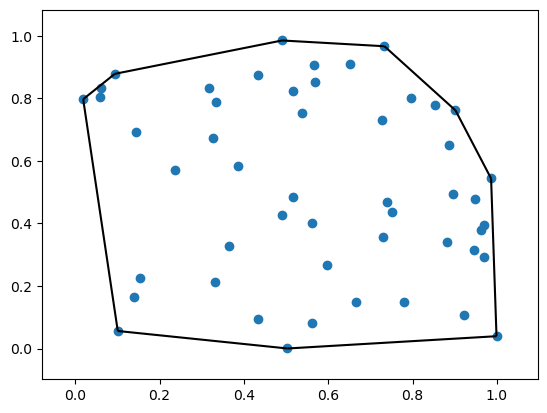

In [4]:
random_2D_array = np.random.random_sample((50,2))
hull = ConvexHull(random_2D_array)
sample_hull_plot = convex_hull_plot_2d(hull)

You can re-run the code cell again to generate more random convex hull plots. 

You can also review the Scipy Spatial documentation under **References** for more details about the `scipy.spatial` library.

## Load Cholera data

In [5]:
import pandas as pd

pd.__version__

'1.5.3'

In [6]:
pumps_df = pd.read_csv('data/pumps.csv')

pumps_df

,FID,LON,LAT,Street
0,250,-0.136668,51.513341,Broadwick Street
1,251,-0.139586,51.513876,Kingly Street
2,252,-0.139671,51.514906,Ramillies Place
3,253,-0.131630,51.512354,Dean Street
4,254,-0.133594,51.512139,Rupert Street
5,255,-0.135919,51.511542,Bridle Lane
6,256,-0.133962,51.510019,Regent Street
7,257,-0.138199,51.511295,Warwick Street


In [7]:
deaths_df = pd.read_csv('data/cholera_deaths.csv')

deaths_df

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317
3,3,1,-0.137812,51.513262
4,4,4,-0.137767,51.513204
...,...,...,...,...
245,245,3,-0.137108,51.514526
246,246,2,-0.137065,51.514706
247,247,1,-0.138474,51.512311
248,248,1,-0.138123,51.511998


## Prepare data for computing convex hull

In [8]:
points_pumps = np.array([[lat,lon] for lat,lon in pumps_df[['LAT','LON']].values])

points_pumps

array([[51.513341, -0.136668],
       [51.513876, -0.139586],
       [51.514906, -0.139671],
       [51.512354, -0.13163 ],
       [51.512139, -0.133594],
       [51.511542, -0.135919],
       [51.510019, -0.133962],
       [51.511295, -0.138199]])

In [9]:
points_deaths = np.array([[lat,lon] for lat,lon in deaths_df[['LAT','LON']].values])

points_deaths

array([[51.513418, -0.13793 ],
       [51.513361, -0.137883],
       [51.513317, -0.137853],
       [51.513262, -0.137812],
       [51.513204, -0.137767],
       [51.513184, -0.137537],
       [51.513359, -0.1382  ],
       [51.513328, -0.138045],
       [51.513323, -0.138276],
       [51.513427, -0.138223],
       [51.513381, -0.138337],
       [51.513462, -0.138563],
       [51.513216, -0.138426],
       [51.513169, -0.138378],
       [51.513116, -0.138337],
       [51.51324 , -0.138645],
       [51.513164, -0.138698],
       [51.513178, -0.137924],
       [51.513111, -0.137865],
       [51.513055, -0.137811],
       [51.513441, -0.138762],
       [51.513592, -0.138799],
       [51.513402, -0.139045],
       [51.51338 , -0.13897 ],
       [51.513411, -0.138863],
       [51.513641, -0.138752],
       [51.513693, -0.138808],
       [51.513745, -0.138856],
       [51.513676, -0.138887],
       [51.51359 , -0.139239],
       [51.513663, -0.139321],
       [51.513502, -0.139316],
       [

### Combine all points

In [10]:
points = np.concatenate((points_pumps, points_deaths), axis=0)

points[3,0], points[3,1]

(51.512354, -0.13163)

## Compute Convex Hull

In [11]:
from scipy.spatial import ConvexHull, Voronoi

In [12]:
hull = ConvexHull(points)

hull

In [13]:
hull.vertices

array([  3,   6,   7,  42,   2, 186, 185], dtype=int32)

In [14]:
hull.simplices

array([[  3,   6],
       [  7,   6],
       [  7,  42],
       [  2, 186],
       [  2,  42],
       [185, 186],
       [185,   3]], dtype=int32)

In [15]:
for simplex in hull.simplices:
    print("simplex, indices of points:", simplex)
    print ("points, 0 and 1:", points[simplex,0], points[simplex,1])

simplex, indices of points: [3 6]
points, 0 and 1: [51.512354 51.510019] [-0.13163  -0.133962]
simplex, indices of points: [7 6]
points, 0 and 1: [51.511295 51.510019] [-0.138199 -0.133962]
simplex, indices of points: [ 7 42]
points, 0 and 1: [51.511295 51.513298] [-0.138199 -0.140074]
simplex, indices of points: [  2 186]
points, 0 and 1: [51.514906 51.515834] [-0.139671 -0.134474]
simplex, indices of points: [ 2 42]
points, 0 and 1: [51.514906 51.513298] [-0.139671 -0.140074]
simplex, indices of points: [185 186]
points, 0 and 1: [51.514606 51.515834] [-0.133393 -0.134474]
simplex, indices of points: [185   3]
points, 0 and 1: [51.514606 51.512354] [-0.133393 -0.13163 ]


In [16]:
x=[]
y=[]
for vertex in hull.vertices:
    y.append(points[vertex,0])
    x.append(points[vertex,1])
    
x,y

([-0.13163, -0.133962, -0.138199, -0.140074, -0.139671, -0.134474, -0.133393],
 [51.512354, 51.510019, 51.511295, 51.513298, 51.514906, 51.515834, 51.514606])

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

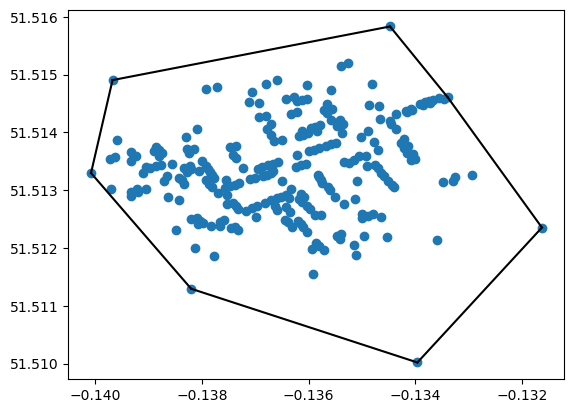

In [18]:
plt.plot(points[:,1], points[:,0], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,1], points[simplex,0], 'k-')
    
plt.show()

### Solve for vertices (points) of convex hull

In [19]:
from shapely.geometry import Point, MultiPoint, Polygon

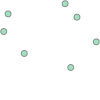

In [20]:
vertex_points = MultiPoint([(points[vertex,1], points[vertex,0]) \
                            for vertex in hull.vertices])

vertex_points

### Convert vertices to a Shapely Polygon and apply `.buffer()` function

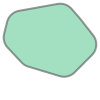

In [31]:
from shapely.geometry import Point, Polygon

# Example: ensure vertex_points is a list of shapely Point objects
# vertex_points = [Point(x, y), Point(x2, y2), ...]

# vertex_points is a MultiPoint object
convexhull_poly = Polygon([(p.x, p.y) for p in vertex_points.geoms]).buffer(0.002)

convexhull_poly



Recall the buffer function we used in isochrone mapping.

### Convert convex hull polygon to Geopandas geodataframe

In [32]:
import geopandas as gpd

gpd.__version__

'1.0.1'

In [33]:
crs = {'init': 'epsg:4326'}
convexhull_gdf = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[convexhull_poly])

convexhull_gdf

,geometry
0,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."


Recall the CRS function we used for isochrone mapping. 

<Axes: >

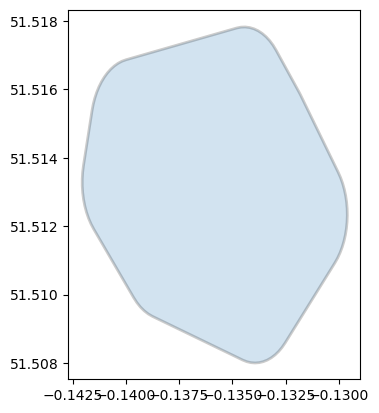

In [34]:
convexhull_gdf.plot(alpha=0.2, edgecolor='black',linewidth=2)

### Save the convex hull polygon

In [35]:
convexhull_gdf.to_file('outputs/convexhull.shp')

convexhull_gdf

,geometry
0,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."


### Alternative method to display convex hull

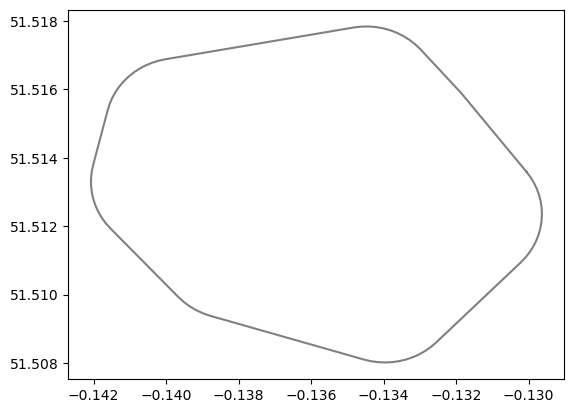

In [36]:
x,y = convexhull_poly.exterior.xy
plt.plot(x,y, color='gray')

## Bring all the plots together

### Plot pumps

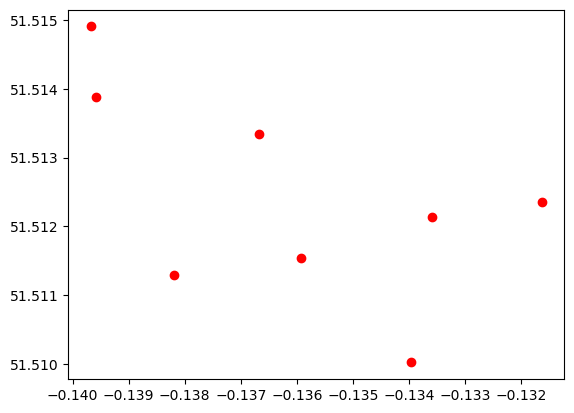

In [40]:
plt.plot(points_pumps[:,1], points_pumps[:,0], 'o', color='red', )

### Plot death locations

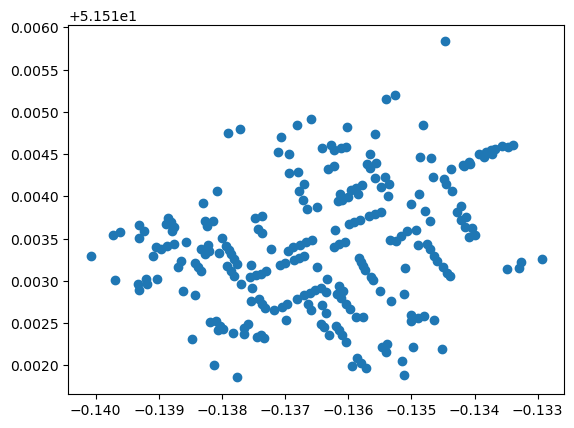

In [41]:
plt.plot(points_deaths[:,1], points_deaths[:,0], 'o')

### Combined plots: Minimum Viable Product

Text(0.5, 1.0, 'Pumps and Deaths with Alpha Shape, Soho District')

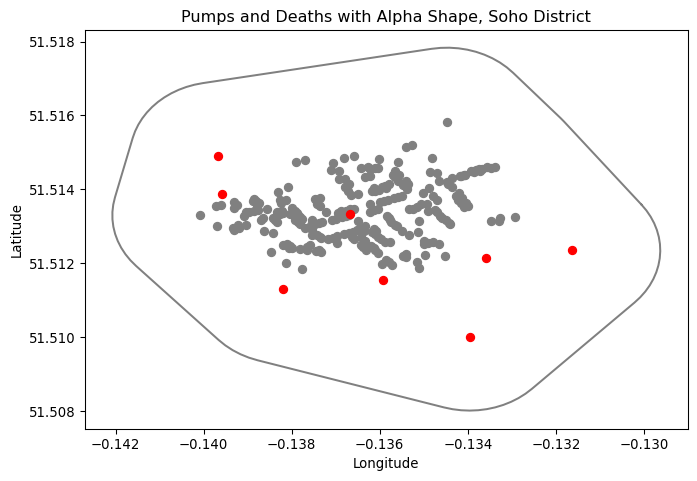

In [42]:
my_dpi=96

fig, ax = plt.subplots(figsize=((432*1.8)/my_dpi, (288*1.8)/my_dpi), dpi=my_dpi)

# plot death locations, color this grey
ax.plot(points_deaths[:,1], points_deaths[:,0], 'o', color='grey')

# plot pump locations, color this red
ax.plot(points_pumps[:,1], points_pumps[:,0], 'o', color='red', )

# plot convex hull polygon
x,y = convexhull_poly.exterior.xy
ax.plot(x,y, color='gray')

# set title and axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Pumps and Deaths with Alpha Shape, Soho District')

With this Python approach, we know we can use the convex hull to constrain potential infinite vertices when computing Voronoi polygons.

## Alternative Method for Computing Convex Hull - `alphashape`

See Notebook 3 for an alternative method to compute convex hull using the `alphashape` package.

## References

1. Convex Hull Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
2. Scipy Spatial Tutorial (includes convex hull): https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.convex_hull_plot_2d.html#scipy.spatial.convex_hull_plot_2d
4. Numpy concatenate arrays: http://lagrange.univ-lyon1.fr/docs/numpy/1.11.0/reference/generated/numpy.concatenate.html